## FizzBuzz using Neural Networks

This Notebook consists on another way to solve the typical FizzBuzz interview question, using Neural Networks

<img src="FizzBuzz/NN_fizzbuzz.jpg" alt="Drawing" style="width: 500px;"/>


#### Importing the usuals

In [1]:
%matplotlib notebook


import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense
from sklearn import metrics
import matplotlib.pyplot as plt

In [4]:
# Value on which a prediction is considered a Fizz or a Buzz
THRESHOLD = 0.9

# Number of binary digits to use for the enconding of the data
NUM_DIGITS = 10


def binary_encoder(value, num_digits):
    listOfBits = list(np.binary_repr(value, num_digits))
    return np.array([int(i) for i in listOfBits])


def categorize_predictions(predictions):
    predictions[:,0] = np.where(predictions[:,0] > THRESHOLD, 1, 0)
    predictions[:,1] = np.where(predictions[:,1] > THRESHOLD, 1, 0)
    return predictions

def fizz_buzz(predictions, correct_values):
    wrong_values = np.sum(np.abs(predictions - y_test))
    
    print("The algorithm had {0} missclassified Fizzs and {1} missclassified Buzzs, finishing with an acc = {2}.\n".format(
        wrong_values, wrong_values, (1 - (wrong_values)/predictions.size)))
    
    for i,v in enumerate(predictions):  
        string = ""
        if v[0] == 1:    string += "Fizz"
        if v[1] == 1:    string += "Buzz"
        if v[0] != 1 and v[1] != 1:    string += str(i)
        print(string)

### Initializing the training data

The input consists on the binary representation of a number using NUM_DIGITS bits.<br>
The input training data consiststs on the binary representation of every number from 100 to $ 2^{NUM\_DIGITS} $

The output consists of two flags, one that is 1 the input is multiple of three and 0 otherwise, and another that is 1 if a number is a multiple of 5 and 0 everywhere else.<br>

In [5]:
x_train_int = np.arange(100, 2**NUM_DIGITS)
x_train = np.array([binary_encoder(i,10) for i in x_train_int])

y_train = np.zeros([x_train_int.size, 2])
y_train[:,0] = np.where(x_train_int % 5 == 0, 1 , 0)
y_train[:,1] = np.where(x_train_int % 3 == 0, 1 , 0)

### Initializing the testing data

The test input data is obviously the numbers for which we want to compute FizzBuzz, from 0 to 100, coverted in binary with NUM_DIGITS bits.

The testing output data is also computed to check the accuracy of the final model.

In [6]:
x_test_int =  np.arange(100)
x_test = np.array([binary_encoder(i, NUM_DIGITS) for i in x_test_int])

y_test = np.zeros([x_test_int.size, 2])
y_test[:,0] = np.where(x_test_int % 5 == 0, 1 , 0)
y_test[:,1] = np.where(x_test_int % 3 == 0, 1 , 0)

In [7]:
classifier = Sequential()
classifier.add(Dense(64, kernel_initializer = "uniform", activation = "relu", input_dim = 10))
classifier.add(Dense(64, kernel_initializer = "uniform", activation = "relu" ))
classifier.add(Dense(2, kernel_initializer = "uniform", activation = "sigmoid"))
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics=["accuracy"])

In [8]:
history = classifier.fit(x_train, y_train, shuffle = True, epochs = 800)

Epoch 1/800
29/29 [==============================] - 1s 3ms/step - loss: 0.6851 - accuracy: 0.2906
Epoch 2/800
29/29 [==============================] - 0s 3ms/step - loss: 0.5880 - accuracy: 0.2520
Epoch 3/800
29/29 [==============================] - 0s 3ms/step - loss: 0.5710 - accuracy: 0.2745
Epoch 4/800
29/29 [==============================] - 0s 3ms/step - loss: 0.5832 - accuracy: 0.2728
Epoch 5/800
29/29 [==============================] - 0s 3ms/step - loss: 0.5860 - accuracy: 0.2448
Epoch 6/800
29/29 [==============================] - 0s 3ms/step - loss: 0.5666 - accuracy: 0.2848
Epoch 7/800
29/29 [==============================] - 0s 4ms/step - loss: 0.5750 - accuracy: 0.2614
Epoch 8/800
29/29 [==============================] - 0s 4ms/step - loss: 0.5668 - accuracy: 0.2870
Epoch 9/800
29/29 [==============================] - 0s 3ms/step - loss: 0.5520 - accuracy: 0.2534
Epoch 10/800
29/29 [==============================] - 0s 3ms/step - loss: 0.5603 - accuracy: 0.2681
Epoch 11/

29/29 [==============================] - 0s 3ms/step - loss: 0.4041 - accuracy: 0.4548
Epoch 84/800
29/29 [==============================] - 0s 3ms/step - loss: 0.3762 - accuracy: 0.4464
Epoch 85/800
29/29 [==============================] - 0s 3ms/step - loss: 0.3856 - accuracy: 0.4627
Epoch 86/800
29/29 [==============================] - 0s 4ms/step - loss: 0.3738 - accuracy: 0.4433
Epoch 87/800
29/29 [==============================] - 0s 4ms/step - loss: 0.3764 - accuracy: 0.4522
Epoch 88/800
29/29 [==============================] - 0s 4ms/step - loss: 0.3626 - accuracy: 0.4381
Epoch 89/800
29/29 [==============================] - 0s 4ms/step - loss: 0.3741 - accuracy: 0.4772
Epoch 90/800
29/29 [==============================] - 0s 3ms/step - loss: 0.3739 - accuracy: 0.4584
Epoch 91/800
29/29 [==============================] - 0s 4ms/step - loss: 0.3556 - accuracy: 0.4361
Epoch 92/800
29/29 [==============================] - 0s 3ms/step - loss: 0.3559 - accuracy: 0.4384
Epoch 93/800


29/29 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.4822
Epoch 165/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2332 - accuracy: 0.4891
Epoch 166/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2225 - accuracy: 0.4663
Epoch 167/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.4549
Epoch 168/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2302 - accuracy: 0.4816
Epoch 169/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2185 - accuracy: 0.4303
Epoch 170/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2279 - accuracy: 0.4999
Epoch 171/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2218 - accuracy: 0.5052
Epoch 172/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2120 - accuracy: 0.4738
Epoch 173/800
29/29 [==============================] - 0s 3ms/step - loss: 0.2124 - accuracy: 0.4657
Epoc

29/29 [==============================] - 0s 3ms/step - loss: 0.0731 - accuracy: 0.5011
Epoch 245/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0779 - accuracy: 0.4866
Epoch 246/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0798 - accuracy: 0.4981
Epoch 247/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0803 - accuracy: 0.4690
Epoch 248/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0694 - accuracy: 0.4835
Epoch 249/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0668 - accuracy: 0.5125
Epoch 250/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0767 - accuracy: 0.4503
Epoch 251/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0704 - accuracy: 0.5093
Epoch 252/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0736 - accuracy: 0.5071
Epoch 253/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0673 - accuracy: 0.4814
Epoc

29/29 [==============================] - 0s 3ms/step - loss: 0.0327 - accuracy: 0.5171
Epoch 326/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0356 - accuracy: 0.5092
Epoch 327/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0357 - accuracy: 0.5009
Epoch 328/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0347 - accuracy: 0.5063
Epoch 329/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0343 - accuracy: 0.5080
Epoch 330/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0330 - accuracy: 0.5368
Epoch 331/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.4901
Epoch 332/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0365 - accuracy: 0.5080
Epoch 333/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0316 - accuracy: 0.5223
Epoch 334/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0307 - accuracy: 0.5008
Epoc

29/29 [==============================] - 0s 3ms/step - loss: 0.0254 - accuracy: 0.5249
Epoch 407/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0234 - accuracy: 0.4984
Epoch 408/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0189 - accuracy: 0.4947
Epoch 409/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0174 - accuracy: 0.4867
Epoch 410/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0246 - accuracy: 0.4992
Epoch 411/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0192 - accuracy: 0.5164
Epoch 412/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0193 - accuracy: 0.4995
Epoch 413/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0141 - accuracy: 0.5144
Epoch 414/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0137 - accuracy: 0.5074
Epoch 415/800
29/29 [==============================] - 0s 4ms/step - loss: 0.0196 - accuracy: 0.5386
Epoc

29/29 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.5078
Epoch 488/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0088 - accuracy: 0.5513
Epoch 489/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.5543
Epoch 490/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0100 - accuracy: 0.5367
Epoch 491/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0092 - accuracy: 0.5254
Epoch 492/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0117 - accuracy: 0.5492
Epoch 493/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0075 - accuracy: 0.5530
Epoch 494/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.5458
Epoch 495/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0094 - accuracy: 0.5145
Epoch 496/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0076 - accuracy: 0.5666
Epoc

29/29 [==============================] - 0s 3ms/step - loss: 0.0037 - accuracy: 0.5654
Epoch 569/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0041 - accuracy: 0.5550
Epoch 570/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.5826
Epoch 571/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0035 - accuracy: 0.5568
Epoch 572/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0043 - accuracy: 0.5702
Epoch 573/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.5753
Epoch 574/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0030 - accuracy: 0.5306
Epoch 575/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0047 - accuracy: 0.5832
Epoch 576/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0044 - accuracy: 0.5766
Epoch 577/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0042 - accuracy: 0.5643
Epoc

29/29 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 0.5579
Epoch 649/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.5627
Epoch 650/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.5481
Epoch 651/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0020 - accuracy: 0.5419
Epoch 652/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.5420
Epoch 653/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.5625
Epoch 654/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0019 - accuracy: 0.5216
Epoch 655/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0017 - accuracy: 0.5543
Epoch 656/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.5661
Epoch 657/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0021 - accuracy: 0.5429
Epoc

29/29 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.5845
Epoch 730/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.5766
Epoch 731/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0011 - accuracy: 0.5635
Epoch 732/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.5716
Epoch 733/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.5878
Epoch 734/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.5504
Epoch 735/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0016 - accuracy: 0.5172
Epoch 736/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0015 - accuracy: 0.5682
Epoch 737/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0012 - accuracy: 0.5912
Epoch 738/800
29/29 [==============================] - 0s 3ms/step - loss: 0.0010 - accuracy: 0.5711
Epoc

In [9]:
predictions = classifier.predict(x_test)
predictions = categorize_predictions(predictions)

In [10]:
fizz_buzz(predictions,y_train)

The algorithm had 5.0 missclassified Fizzs and 5.0 missclassified Buzzs, finishing with an acc = 0.975.

FizzBuzz
1
2
Buzz
4
Fizz
Buzz
7
8
Buzz
Fizz
11
Buzz
13
14
FizzBuzz
16
17
Buzz
19
Fizz
21
22
23
Buzz
Fizz
26
Buzz
28
29
FizzBuzz
31
32
Buzz
34
Fizz
Buzz
37
38
Buzz
Fizz
41
42
43
44
FizzBuzz
46
47
Buzz
49
Fizz
Buzz
52
53
Buzz
Fizz
56
Buzz
58
59
FizzBuzz
61
62
Buzz
64
Fizz
Buzz
67
68
Buzz
70
71
Buzz
73
74
FizzBuzz
76
77
Buzz
79
Fizz
81
82
83
Buzz
Fizz
86
87
88
89
FizzBuzz
91
92
Buzz
94
Fizz
Buzz
97
98
Buzz


<IPython.core.display.Javascript object>


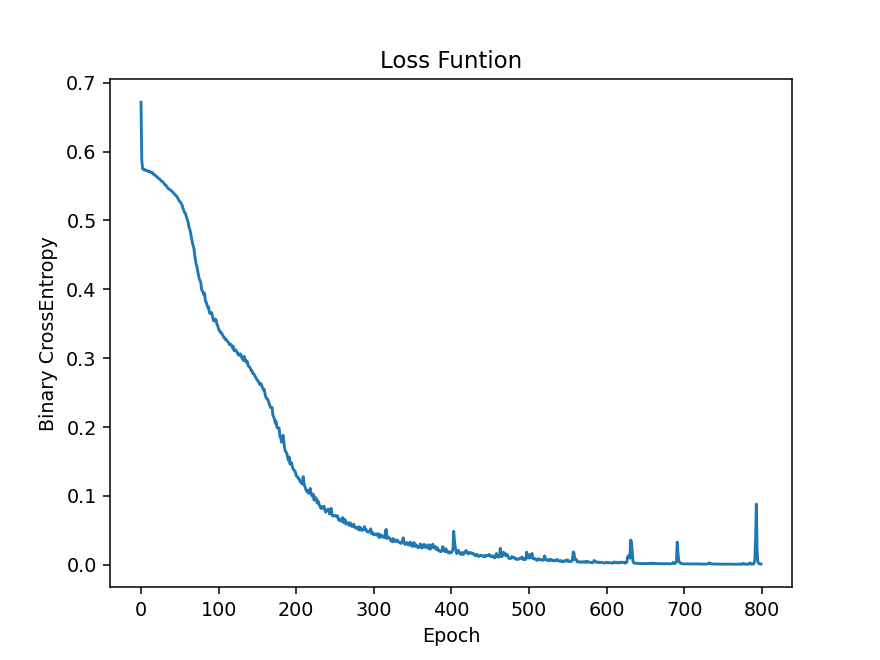

In [11]:
plt.figure()

y = history.history["loss"]
x = range(800)

plt.title("Loss Funtion")
plt.xlabel("Epoch")
plt.ylabel("Binary CrossEntropy")

_ = plt.plot(x,y)

## Confusion Matrix

Bellow, we can see the confusion matrices for the Fizz and then the Buzz labels

<IPython.core.display.Javascript object>


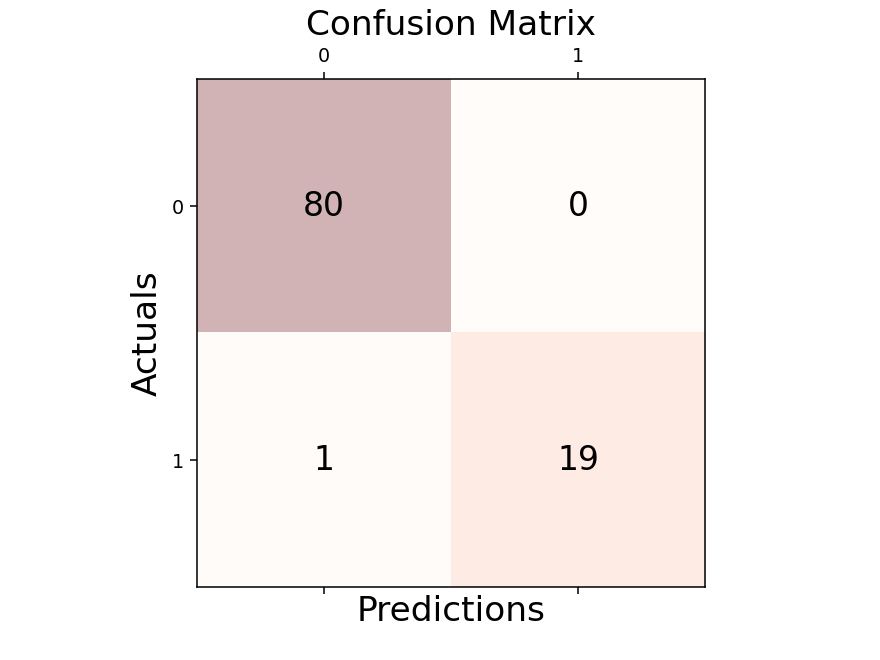

In [27]:
confusion_matrix = metrics.confusion_matrix(y_test[:,0], predictions[:,0])

fig, ax = plt.subplots()
ax.matshow(confusion_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
plt.show()

<IPython.core.display.Javascript object>


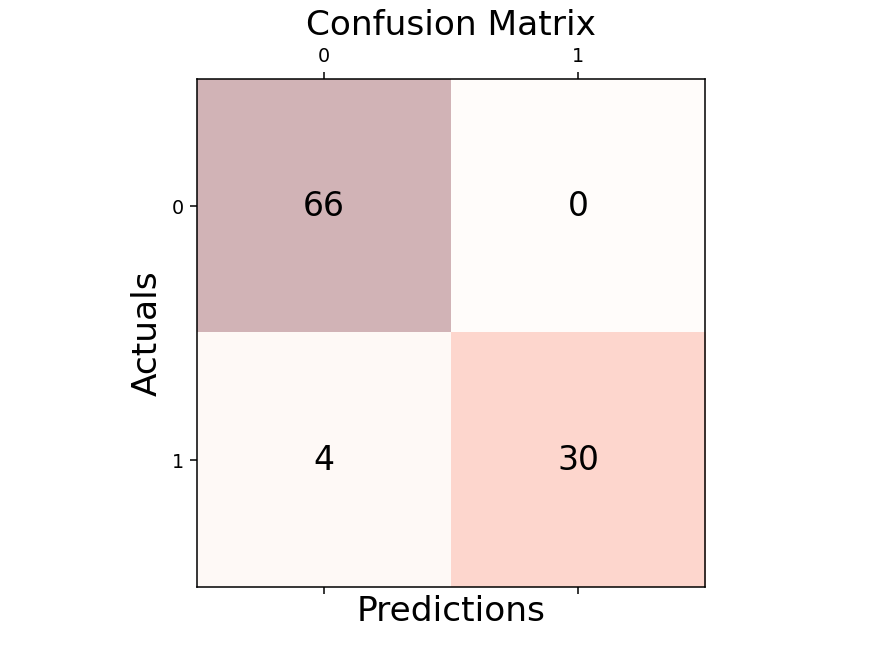

In [30]:
confusion_matrix = metrics.confusion_matrix(y_test[:,1], predictions[:,1])

fig, ax = plt.subplots()
ax.matshow(confusion_matrix, cmap=plt.cm.Reds, alpha=0.3)
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        ax.text(x=j, y=i,s=confusion_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Confusion Matrix', fontsize=18)
_=plt.show()